<br> <font size=7 color=#009999> <b> Tâche 9 - Phonon bands </b> <br><br>

<font size=6 color=#009999> <br> Imports <br> <br>

In [1]:
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from IPython.display import display
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
from matplotlib import pyplot as plt 
import numpy as np

<font size=6 color=#009999> <br> Téléchargement du fichier CIF du matériau mp-867168 ($Sr_2SbAu$) <br> <br>

In [2]:
with MPRester("V4zgRFcb4T97MTrH") as m:
    structure = m.get_structure_by_material_id("mp-867168")
    band = m.get_phonon_bandstructure_by_material_id("mp-867168")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



<font size=6 color=#009999> <br> Structure de bande de phonons <br> <br>

Le graphe suivant illustre la structure de bande de phonons du $Sr_2SbAu$ en fonction des vecteurs d'onde de la zone de Brillouin. Les distances entre les différents points de la zone de Brillouin sont données en dessous.

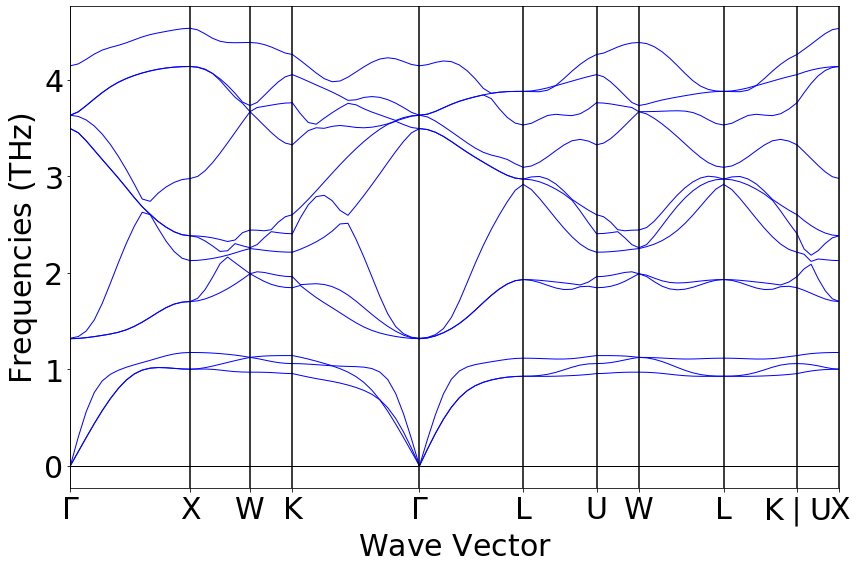

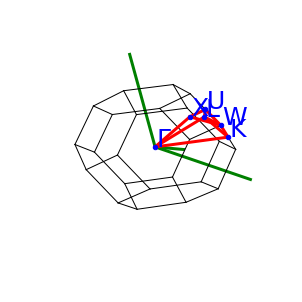

In [3]:
plot = PhononBSPlotter(band)
plot.get_plot()
plot.plot_brillouin()

data = plot.bs_plot_data()
ticks = data.get("ticks")
distance = ticks.get("distance")
distances = data.get("distances")
label = ticks.get("label")
frequency = data.get("frequency")
lattice = data.get("lattice")

In [4]:
print("Distances des points sur la zone de Brillouin")
print("-----------------------")
for i in range(len(distance)):
    if ticks.get("label")[i] == "$\Gamma$" :
        ticks.get("label")[i] = "\u0393"
    print(label[i], " : ", distance[i])
    print("-----------------------")

Distances des points sur la zone de Brillouin
-----------------------
Γ  :  0.0
-----------------------
X  :  0.8095406493281242
-----------------------
X  :  0.8095406493281242
-----------------------
W  :  1.2143109739921865
-----------------------
W  :  1.2143109739921865
-----------------------
K  :  1.5005268153852254
-----------------------
K  :  1.5005268153852254
-----------------------
Γ  :  2.3591743395643423
-----------------------
Γ  :  2.3591743395643423
-----------------------
L  :  3.0602571072786464
-----------------------
L  :  3.0602571072786464
-----------------------
U  :  3.555997486502465
-----------------------
U  :  3.555997486502465
-----------------------
W  :  3.842213327895504
-----------------------
W  :  3.842213327895504
-----------------------
L  :  4.414645010681581
-----------------------
L  :  4.414645010681581
-----------------------
K$\mid$U  :  4.9103853899054
-----------------------
X  :  5.196601231298441
-----------------------


<font size=6 color=#009999> <br> Vitesse du son <br> <br>

La vitesse du son est donnée par la pente de la vitesse de dispersion $\frac{\partial \omega}{\partial k}$. Pour de petites valeurs de $k$, on peut faire l'approximation de linéarité entre la pulsation du phonon et son vecteur d'onde. Dans ce cas, la vitesse du son est approximée par une constante. 

<font size=5 color=#009999> <br> 1. Direction $\Gamma-L$ <br> <br>

In [5]:
frequency1 = frequency[4][2]
k_distances = distances[4]
derivative = np.gradient(frequency1, k_distances[1]-k_distances[0])
pente_son = np.add(np.multiply(k_distances, derivative[0]), np.add(- np.multiply(k_distances[0], derivative[0]), frequency1[0]))
approx_son = (pente_son[-1]-pente_son[0])/(k_distances[-1]-k_distances[0])

In [6]:
print("Vitesse du son maximal dans la section observée (courbe verte) : ", np.max(derivative), " (en k =", k_distances[np.argmax(derivative)], ")")
print("Vitesse du son minimal dans la section observée (courbe verte) : ", np.min(derivative), " (en k =", k_distances[np.argmin(derivative)], ")")
print("Approximation de la vitesse du son par une approximation linéaire pour de petits k : ", approx_son)

Vitesse du son maximal dans la section observée (courbe verte) :  5.059998172173834  (en k = 2.3591743395643423 )
Vitesse du son minimal dans la section observée (courbe verte) :  0.05772728150801465  (en k = 3.0602571072786464 )
Approximation de la vitesse du son par une approximation linéaire pour de petits k :  5.059998172173834


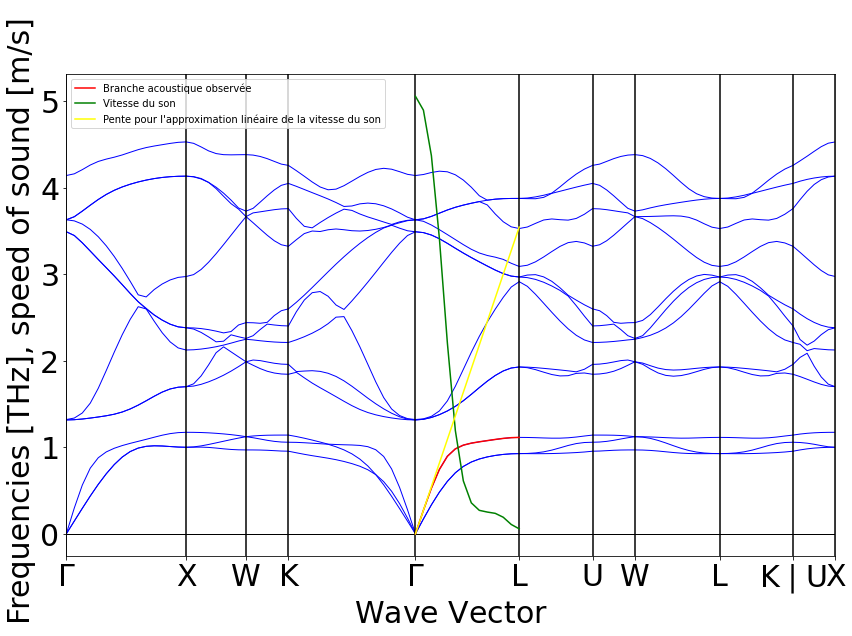

In [7]:
plot.get_plot()
plt.plot(k_distances, frequency1, color="red", label="Branche acoustique observée")
plt.plot(k_distances, derivative, color="green", label="Vitesse du son")
plt.plot(k_distances, pente_son, color="yellow", label="Pente pour l'approximation linéaire de la vitesse du son")
plt.ylabel("Frequencies [THz], speed of sound [m/s] ")
plt.legend()
plt.show()

Ce graphe illustre la vitesse du son d'un phonon dans une bande acoustique de la direction $\Gamma-L$ de la zone de Brillouin (en rouge). La courbe verte représente la vitesse du son en chaque point de cette direction. Elle atteint un maxima en $k = 2.36 = \Gamma$ avec une vitesse du son qui vaut $5.06 m/s$ et un minima en $k = 30.6 = L$ avec une vitesse du son qui vaut $0.06 m/s$.

L'approximation de la vitesse du son est donné par la pente de la courbe jaune qui vaut $5.06 m/s$. En comparant avec les données de la courbe verte, on voit bien que cette approximation linéaire n'est valable que pour des faibles valeurs de $k$ autour de $k = \Gamma$.

<font size=5 color=#009999> <br> 2. Direction $W-L$ <br> <br>

In [8]:
frequency2 = frequency[7][0]
k_distances = distances[7]
derivative = np.gradient(frequency2, k_distances[1]-k_distances[0])
pente_son = np.add(np.multiply(k_distances, derivative[0]), np.add(- np.multiply(k_distances[0], derivative[0]), frequency2[0]))
approx_son = (pente_son[-1]-pente_son[0])/(k_distances[-1]-k_distances[0])
print(derivative)
print(k_distances)

[-0.02699254 -0.05470639 -0.10862685 -0.15121491 -0.16662318 -0.1487538
 -0.10771836 -0.06036844 -0.02018514  0.00400271  0.0088352   0.00645249]
[3.842213327895504, 3.8942525717913923, 3.946291815664383, 3.9983310595602712, 4.050370303456159, 4.102409547352047, 4.154448791225038, 4.206488035120926, 4.258527279016814, 4.310566522912702, 4.362605766785693, 4.414645010681581]


In [9]:
print("Vitesse du son maximal dans la section observée (courbe verte) : ", np.max(derivative), " (en k =", k_distances[np.argmax(derivative)], ")")
print("Vitesse du son minimal dans la section observée (courbe verte) : ", np.min(derivative), " (en k =", k_distances[np.argmin(derivative)], ")")
print("Approximation de la vitesse du son par une approximation linéaire pour de petits k : ", approx_son)

Vitesse du son maximal dans la section observée (courbe verte) :  0.008835198099544871  (en k = 4.362605766785693 )
Vitesse du son minimal dans la section observée (courbe verte) :  -0.16662318112235286  (en k = 4.050370303456159 )
Approximation de la vitesse du son par une approximation linéaire pour de petits k :  -0.026992541845375473


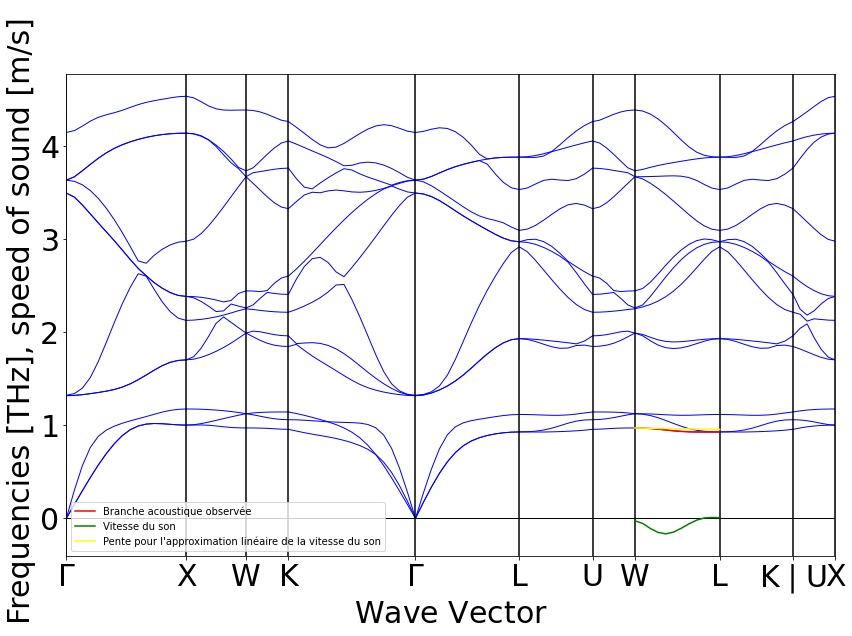

In [10]:
plot.get_plot()
plt.plot(k_distances, frequency2, color="red", label="Branche acoustique observée")
plt.plot(k_distances, derivative, color="green", label="Vitesse du son")
plt.plot(k_distances, pente_son, color="yellow", label="Pente pour l'approximation linéaire de la vitesse du son")
plt.ylabel("Frequencies [THz], speed of sound [m/s] ")
plt.legend()
plt.show()

Ce graphe illustre la vitesse du son d'un phonon dans une bande acoustique de la direction $W-L$ de la zone de Brillouin (en rouge). La courbe verte représente la vitesse du son en chaque point de cette direction. Elle atteint un maxima en $k = 4.36$ avec une vitesse du son qui vaut $0.01 m/s$ et un minima en $k = 4.05$ avec une vitesse du son qui vaut $-0.17 m/s$.

L'approximation de la vitesse du son est donné par la pente de la courbe jaune qui vaut $-0.03 m/s$. En comparant avec les données de la courbe verte, on voit bien que cette approximation linéaire est une approximation grossière de la solution.

<font size=5 color=#009999> <br> 3. Direction $K-\Gamma$ <br> <br>

In [11]:
frequency3 = frequency[3][1]
k_distances = distances[3]
derivative = np.gradient(frequency3, k_distances[1]-k_distances[0])
pente_son = np.add(np.multiply(k_distances, derivative[-1]), np.add(-np.multiply(k_distances[-1], derivative[-1]), frequency3[-1]))
approx_son = (pente_son[-1]-pente_son[0])/(k_distances[-1]-k_distances[0])

In [12]:
print("Vitesse du son maximal dans la section observée (courbe verte) : ", np.max(derivative), " (en k =", k_distances[np.argmax(derivative)], ")")
print("Vitesse du son minimal dans la section observée (courbe verte) : ", np.min(derivative), " (en k =", k_distances[np.argmin(derivative)], ")")
print("Approximation de la vitesse du son par une approximation linéaire pour de petits k : ", approx_son)

Vitesse du son maximal dans la section observée (courbe verte) :  -0.025097562975589238  (en k = 1.5005268153852254 )
Vitesse du son minimal dans la section observée (courbe verte) :  -3.3902635172958164  (en k = 2.3591743395643423 )
Approximation de la vitesse du son par une approximation linéaire pour de petits k :  -3.3902635172958164


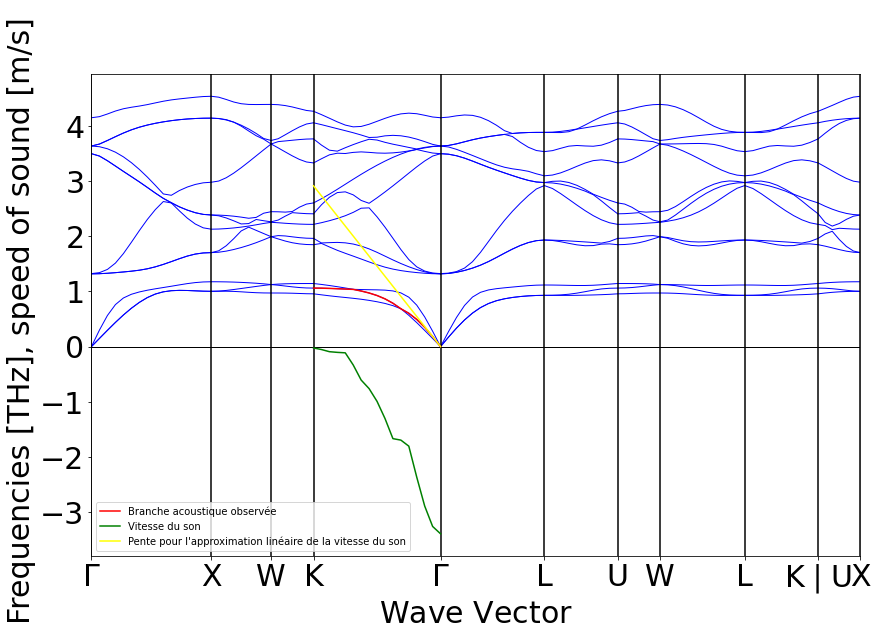

In [13]:
plot.get_plot()
plt.plot(k_distances, frequency3, color="red", label="Branche acoustique observée")
plt.plot(k_distances, derivative, color="green", label="Vitesse du son")
plt.plot(k_distances, pente_son, color="yellow", label="Pente pour l'approximation linéaire de la vitesse du son")
plt.ylabel("Frequencies [THz], speed of sound [m/s] ")
plt.legend()
plt.show()

Ce graphe illustre la vitesse du son d'un phonon dans une bande acoustique de la direction $K-\Gamma$ de la zone de Brillouin (en rouge). La courbe verte représente la vitesse du son en chaque point de cette direction. Elle atteint un maxima en $k = 1.5$ avec une vitesse du son qui vaut $-0.03 m/s$ et un minima en $k = 2.36$ avec une vitesse du son qui vaut $-3.39 m/s$.

L'approximation de la vitesse du son est donné par la pente de la courbe jaune qui vaut $-3.39 m/s$. En comparant avec les données de la courbe verte, on voit bien que cette approximation linéaire n'est valable que pour des faibles valeurs de $k$ autour de $k = \Gamma$.